In [1]:
#!/usr/bin/env python

# Add this line when working on notebook.
%matplotlib inline

# Import the necessary modules
import numpy as np
import netCDF4 as netcdf
import matplotlib.pyplot as plt
# Load the tools for plotting on a global map.
from mpl_toolkits.basemap import Basemap, addcyclic


In [3]:
# Read the file.
fname = 'air.mon.mean.nc'
# Use "with - as" format. Generally accepted in 3.5. Closes automatically if error returned.
with netcdf.Dataset( fname, 'r' ) as fh:
    # "[:]" grabs only the data and creates copy. Does not get metadata.
    p_levs = fh.variables['level'][:]
    lat = fh.variables['lat'][:]
    lon = fh.variables['lon'][:]
    time = fh.variables['time'][:]
    air = fh.variables['air'][:]
    air_min, air_max = fh.variables['air'].valid_range
    act_min, act_max = fh.variables['air'].actual_range


In [4]:
# Apply scale.
#air = (air * 0.01) + 127.65

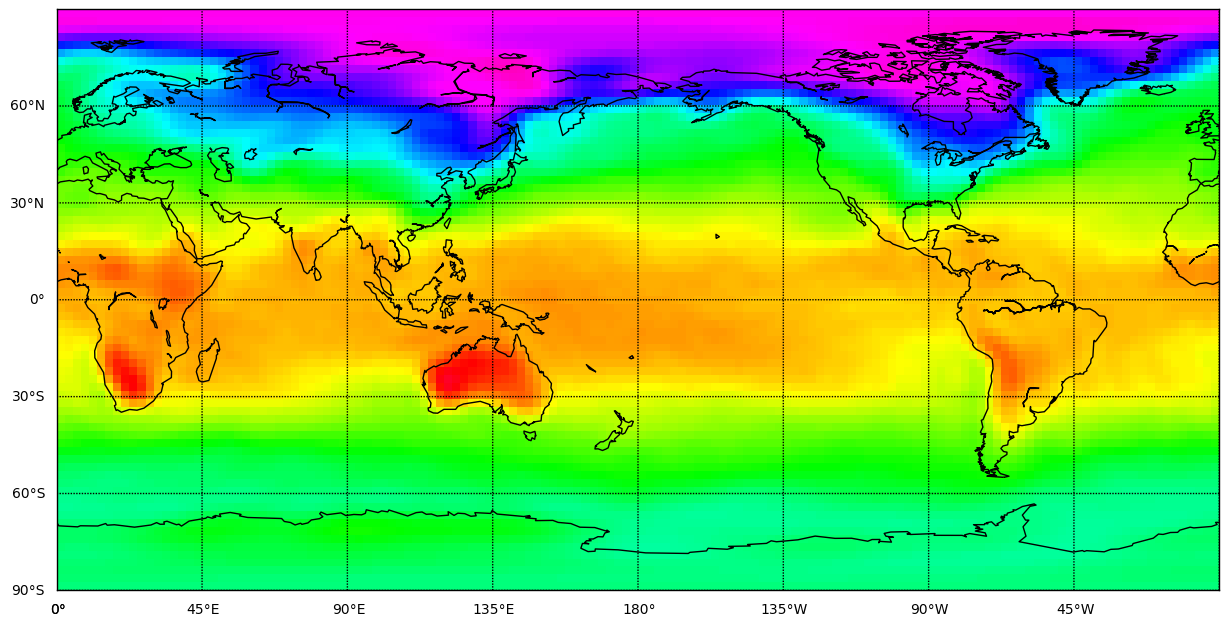

In [8]:
# Initialize the figure artist
fig, ax = plt.subplots( figsize=(15,12) )
# Declare a color map.
cmap = plt.cm.gist_rainbow_r

#m = Basemap(projection='ortho',lat_0=60,lon_0=180)
m = Basemap(lat_0=0,lon_0=180)
m.drawcoastlines()
m.drawmeridians(range(0,360,45), labels=[1,0,0,1])
m.drawparallels(range(-90,90,30), labels=[1,0,0,1])

# Without cyclic wraparound.
lon2d, lat2d = np.meshgrid(lon, lat)
x, y = m(lon2d, lat2d)

# Put the image on the map
#m.imshow( air[0,0,:,:], cmap=cmap )
m.imshow( air[0,0,:,:], origin='upper', interpolation='none', cmap=cmap )

plt.show()

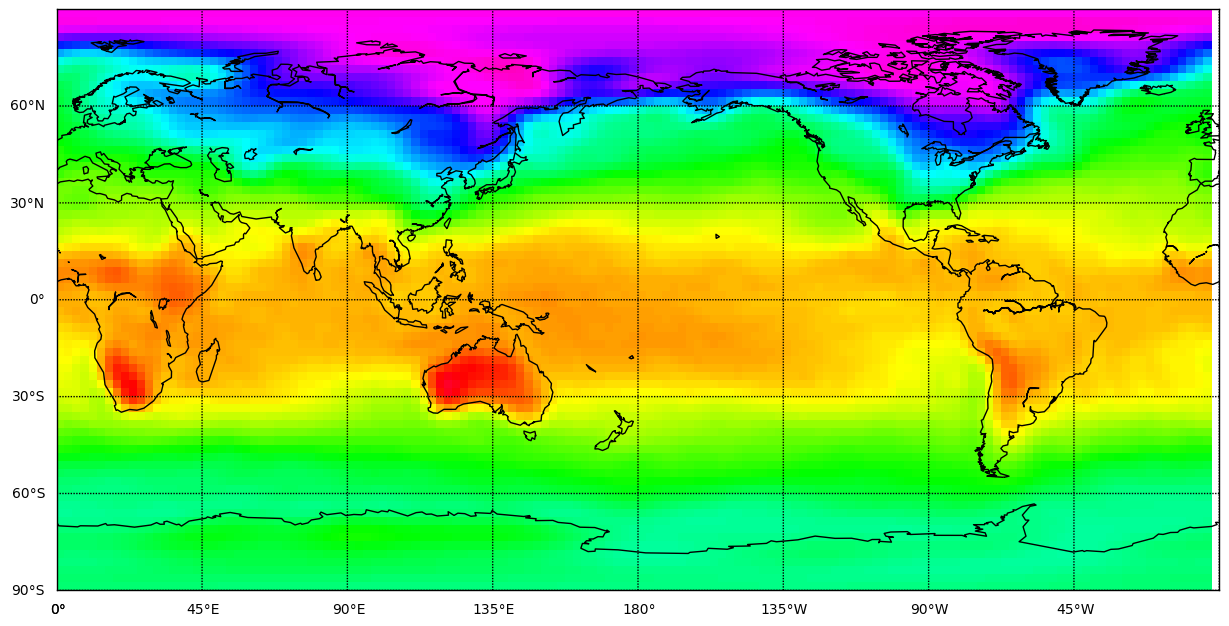

In [9]:
# Initialize the figure artist
fig, ax = plt.subplots( figsize=(15,12) )
# Declare a color map.
cmap = plt.cm.gist_rainbow_r

#m = Basemap(projection='ortho',lat_0=60,lon_0=180)
m = Basemap(lat_0=0,lon_0=180)
m.drawcoastlines()
m.drawmeridians(range(0,360,45), labels=[1,0,0,1])
m.drawparallels(range(-90,90,30), labels=[1,0,0,1])

# Without cyclic wraparound.
lon2d, lat2d = np.meshgrid(lon, lat)
x, y = m(lon2d, lat2d)

m.pcolormesh( x, y, air[0,0,:,:], cmap=cmap )

plt.show()

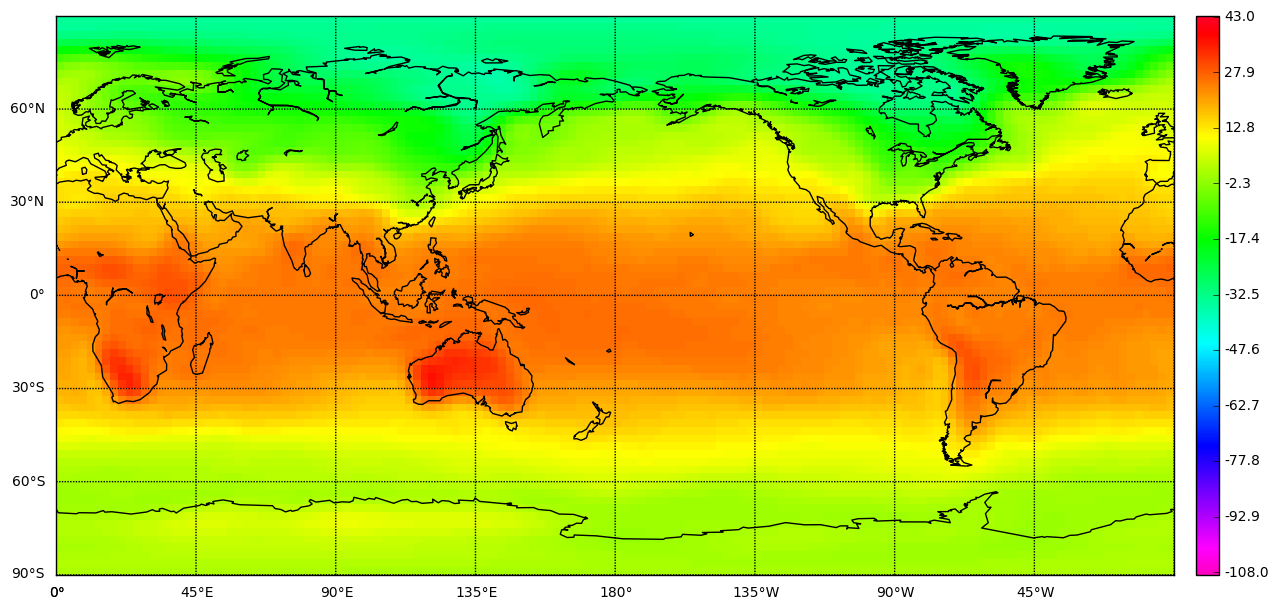

In [10]:
# Initialize the figure artist
fig, ax = plt.subplots( figsize=(15,12) )
# Declare a color map.
cmap = plt.cm.gist_rainbow_r

m = Basemap(lat_0=0,lon_0=180)
m.drawcoastlines()
m.drawmeridians(range(0,360,45), labels=[1,0,0,1])
m.drawparallels(range(-90,90,30), labels=[1,0,0,1])

# The air array does not contain data for the last step. It must
# be copied for the last longitude bin, i.e., 0˚-1˚ = 360˚-0˚.
air_cyclic, lons_cyclic = addcyclic(air[0,0,:,:], lon)
lon2d, lat2d = np.meshgrid(lons_cyclic, lat)
x, y = m(lon2d, lat2d)

vmin=act_min
vmax=act_max
# Setting the vmin and vmax during the image generation allows for the colorbar
# range to set properly.
m.pcolormesh( x, y, air_cyclic, cmap=cmap, vmin=vmin, vmax=vmax )

# Set the colorbar.
labels = np.linspace( int(vmin), int(vmax), 11)
cb = m.colorbar( size='2%' )
cb.set_ticks(labels)
cb.set_ticklabels(labels)
plt.show()

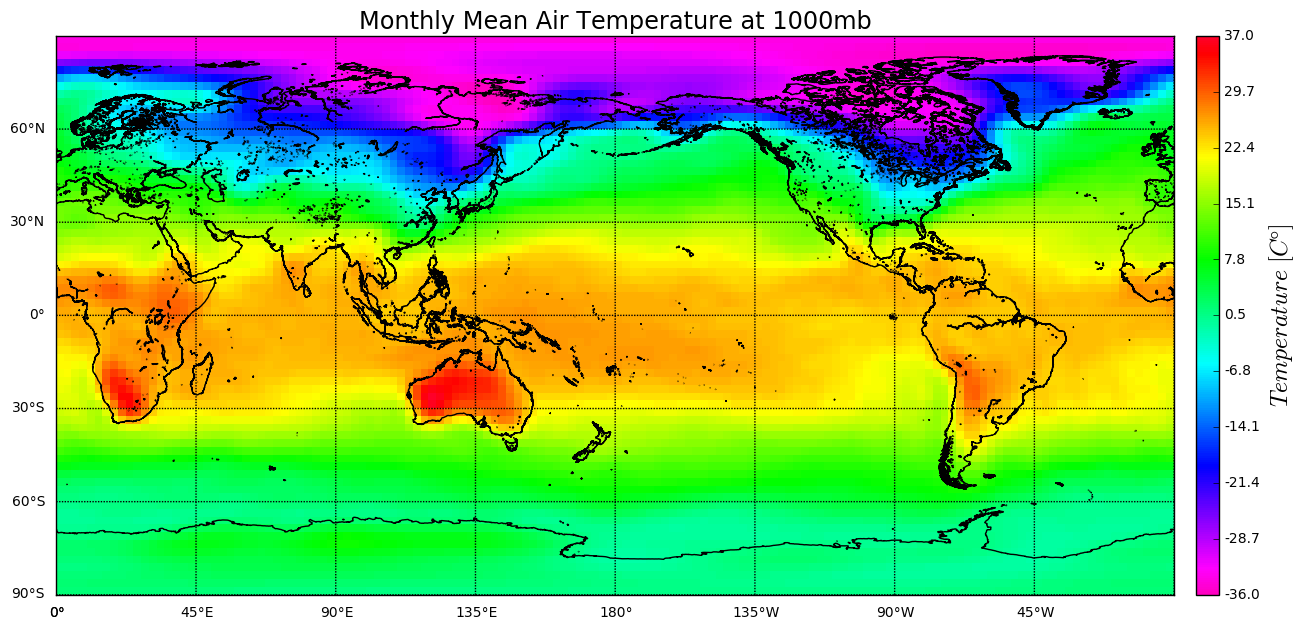

In [14]:
# Initialize the figure artist
fig, ax = plt.subplots( figsize=(15,12) )
# Declare a color map.
cmap = plt.cm.gist_rainbow_r

m = Basemap(lat_0=0,lon_0=180, resolution='h')
m.drawcoastlines()
m.drawmeridians(range(0,360,45), labels=[1,0,0,1])
m.drawparallels(range(-90,90,30), labels=[1,0,0,1])

# The air array does not contain data for the last step. It must
# be copied for the last longitude bin, i.e., 0˚-1˚ = 360˚-0˚.
air_cyclic, lons_cyclic = addcyclic(air[0,0,:,:], lon)
lon2d, lat2d = np.meshgrid(lons_cyclic, lat)
x, y = m(lon2d, lat2d)

m.pcolormesh( x, y, air_cyclic, cmap=cmap, vmin=-36, vmax=37 )

# Set the colorbar.
labels = np.linspace( int(air_cyclic.min()), int(air_cyclic.max()), 11)
cb = m.colorbar( size='2%' )
cb.set_ticks(labels)
cb.set_ticklabels(labels)

# Add labels
title = ax.set_title('Monthly Mean Air Temperature at 1000mb')
title.set_fontsize('xx-large')
cb.set_label('$Temperature\ [C\degree]$', fontsize='xx-large')

plt.show()